In [5]:
import pandas as pd
import json
import random as rnd
import functools
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option ('display.max_rows', 500)

In [2]:
data = pd.read_json('orders.json')

In [3]:
data

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
priority,HIGH,LOW,LOW,HIGH,HIGH,LOW,HIGH,LOW,HIGH,LOW,...,LOW,LOW,LOW,LOW,LOW,LOW,LOW,LOW,LOW,HIGH
product,Laptop,Laptop,Laptop,Chair,GPU,Laptop,Floppy,Chair,Chair,GPU,...,Chair,Chair,Laptop,Chair,GPU,Plant,Chair,GPU,Laptop,Plant
quantity,27,36,34,14,72,25,30,2,69,26,...,26,73,8,18,62,56,72,5,12,29


In [7]:
f = open('orders.json')
data_dict = json.load(f)
data_dict
f.close()

In [9]:
data_dict['1'][]

{'priority': 'HIGH', 'product': 'Laptop', 'quantity': 27}

In [10]:
data[1]

priority      HIGH
product     Laptop
quantity        27
Name: 1, dtype: object

In [11]:
data[1]['priority']

'HIGH'

In [12]:
len(data)

3

In [13]:
len(data_dict)

100

In [19]:
len(data.columns)

100

In [25]:
print([rnd.randrange(1,101) for _ in range(100)])

[51, 78, 79, 6, 35, 20, 23, 13, 64, 11, 37, 8, 44, 97, 14, 30, 58, 27, 3, 12, 9, 41, 34, 77, 10, 36, 5, 95, 9, 92, 17, 84, 86, 5, 17, 97, 70, 87, 10, 23, 69, 9, 21, 46, 66, 66, 39, 40, 27, 29, 30, 99, 83, 44, 35, 90, 1, 55, 66, 49, 6, 39, 89, 2, 16, 40, 84, 83, 7, 11, 85, 82, 31, 37, 20, 32, 27, 44, 76, 33, 74, 15, 15, 75, 22, 75, 18, 80, 64, 100, 48, 49, 94, 50, 36, 9, 43, 38, 10, 26]


In [26]:
print([x+1 for x in range(100)])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [ ]:
print([rnd.rand])

In [29]:
data[1]

priority      HIGH
product     Laptop
quantity        27
Name: 1, dtype: object

In [2]:
L = [1,2,3,4,5]
M = [(x,y) for x,y in zip(L, L[1:])]
M

[(1, 2), (2, 3), (3, 4), (4, 5)]

In [3]:
def setups(L, data):
    return sum([1 for x, y in zip(L, L[1:]) if data[x]['product'] != data[y]['product']])

In [8]:
print(setups(L, data))

2


In [9]:
L[:-1]

[1, 2, 3, 4]

In [10]:
L[::-1]

[5, 4, 3, 2, 1]

In [15]:
data.loc[(data[:,'priority'] == 'HIGH').groupby(data.Trace).idxmax]

InvalidIndexError: (slice(None, None, None), 'priority')

In [14]:
data

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
priority,HIGH,LOW,LOW,HIGH,HIGH,LOW,HIGH,LOW,HIGH,LOW,...,LOW,LOW,LOW,LOW,LOW,LOW,LOW,LOW,LOW,HIGH
product,Laptop,Laptop,Laptop,Chair,GPU,Laptop,Floppy,Chair,Chair,GPU,...,Chair,Chair,Laptop,Chair,GPU,Plant,Chair,GPU,Laptop,Plant
quantity,27,36,34,14,72,25,30,2,69,26,...,26,73,8,18,62,56,72,5,12,29


In [29]:
tdata = data.T
tdata = tdata.rename_axis('order')
tdata

,priority,product,quantity
order,,,
1,HIGH,Laptop,27
2,LOW,Laptop,36
3,LOW,Laptop,34
4,HIGH,Chair,14
5,HIGH,GPU,72
...,...,...,...
96,LOW,Plant,56
97,LOW,Chair,72
98,LOW,GPU,5


In [40]:
new_frame = tdata.loc[(tdata['priority'] == 'HIGH')]
new_frame.index.max()

100

In [42]:
tdata.loc[tdata['priority'] == 'HIGH'].index[0]

1

In [5]:
def priority(L, data):
    # Filter list to list of just high priority orders
    high_only = list(filter((lambda order: data[order]['priority'] == 'HIGH'), L))
    # Find out what the last high priority is
    last = high_only[-1]
    # Determine position of last high priority order with list index
    index = L.index(last)
    return sum([data[L[x]]['quantity'] for x in range(len(L)) if x < index and data[L[x]]['priority'] == 'LOW'])

L = [x+1 for x in range(100)]
L

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [12]:
print(priority(L, data))

3255


In [10]:
L.pop(2)

3

In [16]:
L.insert(97,L.pop(2))

In [17]:
L

[1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 3,
 99,
 100]

In [4]:
def priority_directed_improvement(solutions):
    # improves by priority
    L = solutions[:]
    # Get list of all low prio orders before last high prio order
    high_only = list(filter((lambda order: data[order]['priority'] == 'HIGH'), L))
    last = high_only[-1]
    index = L.index(last)
    bad_low_only = [L[x] for x in range(len(L)) if x < index and data[L[x]]['priority'] == 'LOW']
    # Pick random agent from this list
    moved_order = bad_low_only[rnd.randrange(0, len(bad_low_only))]
    i = L.index(moved_order)
    # Move agent behind last high prio agent
    L.insert(index+1, L.pop(i))
    i = rnd.randrange(0, len(L))
    j = rnd.randrange(0, len(L))
    L[i], L[j] = L[j], L[i]
    return L

In [13]:
def setup_directed_improvement(solutions):
    # Improves setups
    L = solutions[:]
    # Return list of orders where they are sandwhiched by two different types
    crap_orders = [(x, y, z) for x, y, z in zip(L, L[1:], L[2:]) if data[x]['product'] != data[y]['product'] and data[y]['product'] != data[z]['product']]
    swap_orders = crap_orders[rnd.randrange(0, len(crap_orders))]
    i = L.index(swap_orders[1])
    # Find an order with the same type
    similar_orders = [L[x] for x in range(len(L)) if data[L[i]]['product'] == data[L[x]]['product']]
    order_behind = similar_orders[rnd.randrange(0, len(similar_orders))]
    i2 = L.index(order_behind)
    # Move order adjacent to order of same type
    L.insert(i2+1, L.pop(i))
    i = rnd.randrange(0, len(L))
    j = rnd.randrange(0, len(L))
    L[i], L[j] = L[j], L[i]
    return L

In [20]:
print(setup_directed_improvement(L))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 35, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [21]:
def delay_directed_improvement(solutions):
    # Improves by delays
    L = solutions[:]
    delay_list = [(x, y) for x, y in zip(L, L[1:]) if y < x]
    if len(delay_list) == 0:
        i = rnd.randrange(0, len(L))
        j = rnd.randrange(0, len(L))
        L[i], L[j] = L[j], L[i]
        return L
    else:
        swap_orders = delay_list[rnd.randrange(0, len(delay_list))]
        i1 = L.index(swap_orders[0])
        i2 = L.index(swap_orders[1])
        L[i1], L[i2] = L[i2], L[i1]
        i = rnd.randrange(0, len(L))
        j = rnd.randrange(0, len(L))
        L[i], L[j] = L[j], L[i]
        return L

In [22]:
print(delay_directed_improvement(L))

[1, 2, 3, 4, 5, 6, 7, 8, 23, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 9, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [14]:
rnd.randint(0, 2)

1

In [3]:
solutions_df = pd.read_csv('solutions_90000.csv')

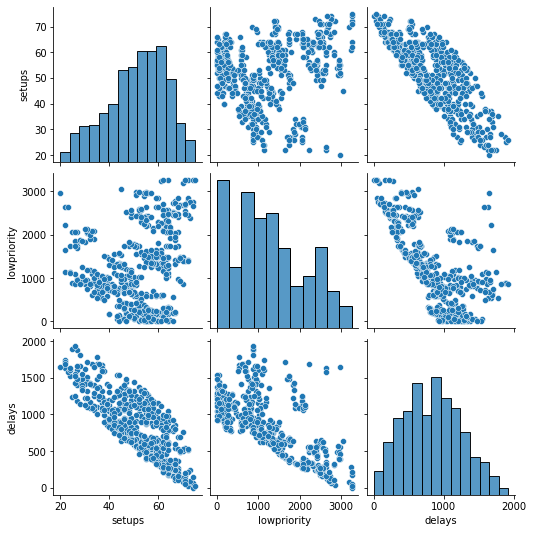

In [4]:
sns.pairplot(solutions_df)

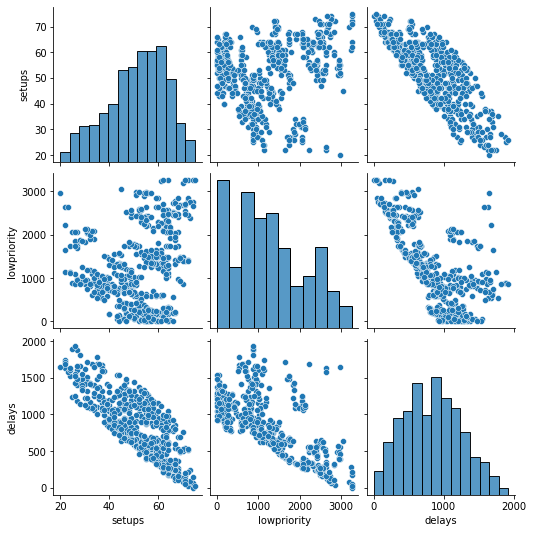

In [6]:
sns_pp = sns.pairplot(solutions_df)
sns_pp.savefig('solution_pairplot.png')